# Game of Features

In [3]:
from pandas import read_csv as read
import pandas as pd
import random
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from plot import pltPRcurve, pltROCcurve 

In [4]:
def prep():
    X = data.loc[:, data.columns != 'isFraud'].values
    y = data.loc[:, 'isFraud'].values

    y=y.astype('int') # не совсем понял, почему https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown

    from sklearn.model_selection import train_test_split as train

    X_train, X_test, y_train, y_test = train(X, y, shuffle=False)

    from sklearn.ensemble import RandomForestClassifier

    model = RandomForestClassifier(n_estimators=110, n_jobs=-1)

    model.fit(X_train, y_train)
    expected = y_test
    predicted = model.predict(X_test)

    pobas = model.predict_proba(X_test)
    preds = pobas[:, 1]

    pltPRcurve(expected, predicted, preds, type(model).__name__)
    ##plt.show()
    ##pltROCcurve(expected, predicted, preds, type(model).__name__)

    
    report = metrics.classification_report(expected, predicted)
    conf_matrix = metrics.confusion_matrix(expected, predicted)

    print(type(model).__name__)
    print(report)
    print(conf_matrix)
   
    ##print(metrics.roc_auc_score(expected, preds))


In [5]:
path = "newFilt500k.csv"
data = read(path, delimiter=",")

data.drop('isFlaggedFraud', axis=1, inplace=True)
data.drop('nameOrig', axis=1, inplace=True)
data.drop('nameDest', axis=1, inplace=True)
##data = pd.get_dummies(data)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,hour,newSender,newReceiver,merchant,fraudsEarly,LTS,LTR,IZoB
0,1,4,181.00,181.0,0.00,0.0,0.0,1,1,1,1,0,0,0,0,1
1,1,1,181.00,181.0,0.00,21182.0,0.0,1,1,1,1,0,0,0,0,1
2,1,3,7107.77,183195.0,176087.23,0.0,0.0,0,1,1,1,1,0,0,0,0
3,1,3,671.64,15123.0,14451.36,0.0,0.0,0,1,1,1,1,0,0,0,0
4,1,3,1373.43,13854.0,12480.57,0.0,0.0,0,1,1,1,1,0,0,0,0


f1=0.920 auc=0.976 ap=0.975
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    110987
           1       0.99      0.86      0.92      4358

   micro avg       0.99      0.99      0.99    115345
   macro avg       0.99      0.93      0.96    115345
weighted avg       0.99      0.99      0.99    115345

[[110945     42]
 [   610   3748]]
Wall time: 22.6 s


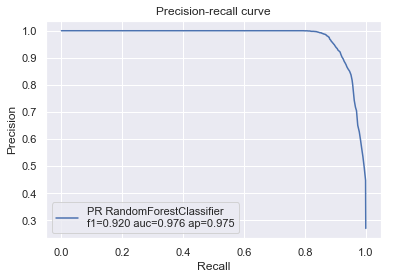

In [22]:
%%time
prep()
plt.savefig("PR-curve.png", dpi=300)


In [6]:
data.drop('newbalanceOrig', axis=1, inplace=True)
#data.drop('newbalanceDest', axis=1, inplace=True)
data.drop('step', axis=1, inplace=True)


In [7]:
data.head()

,type,amount,oldbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,hour,newSender,newReceiver,merchant,fraudsEarly,LTS,LTR,IZoB
0,4,181.00,181.0,0.0,0.0,1,1,1,1,0,0,0,0,1
1,1,181.00,181.0,21182.0,0.0,1,1,1,1,0,0,0,0,1
2,3,7107.77,183195.0,0.0,0.0,0,1,1,1,1,0,0,0,0
3,3,671.64,15123.0,0.0,0.0,0,1,1,1,1,0,0,0,0
4,3,1373.43,13854.0,0.0,0.0,0,1,1,1,1,0,0,0,0


f1=0.928 auc=0.992 ap=0.991
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    110987
           1       1.00      0.87      0.93      4358

   micro avg       0.99      0.99      0.99    115345
   macro avg       0.99      0.93      0.96    115345
weighted avg       0.99      0.99      0.99    115345

[[110968     19]
 [   569   3789]]


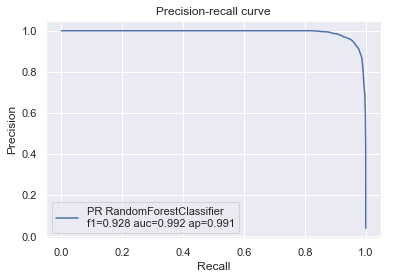

In [14]:
prep()


f1=0.932 auc=0.993 ap=0.993
RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110987
           1       1.00      0.88      0.93      4358

   micro avg       1.00      1.00      1.00    115345
   macro avg       1.00      0.94      0.96    115345
weighted avg       1.00      1.00      1.00    115345

[[110969     18]
 [   540   3818]]


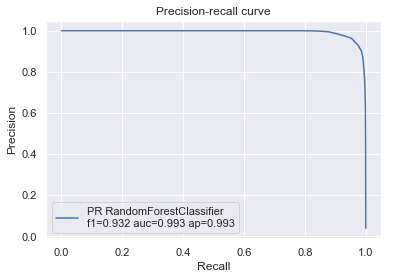

In [8]:
data.drop('oldbalanceDest', axis=1, inplace=True)
prep()

f1=0.934 auc=0.991 ap=0.990
RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110987
           1       0.98      0.89      0.93      4358

   micro avg       1.00      1.00      1.00    115345
   macro avg       0.99      0.94      0.97    115345
weighted avg       1.00      1.00      1.00    115345

[[110928     59]
 [   487   3871]]


,amount,oldbalanceOrg,isFraud,hour,newSender,newReceiver,merchant,fraudsEarly,LTS,LTR,IZoB,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,181.00,181.0,1,1,1,1,0,0,0,0,1,0,0,0,0,1
1,181.00,181.0,1,1,1,1,0,0,0,0,1,0,1,0,0,0
2,7107.77,183195.0,0,1,1,1,1,0,0,0,0,0,0,0,1,0
3,671.64,15123.0,0,1,1,1,1,0,0,0,0,0,0,0,1,0
4,1373.43,13854.0,0,1,1,1,1,0,0,0,0,0,0,0,1,0


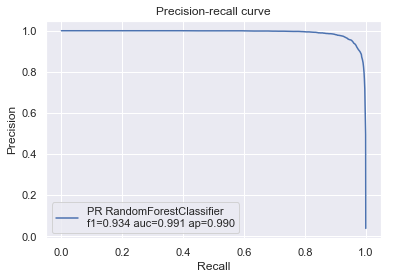

In [16]:
data.drop('newbalanceDest', axis=1, inplace=True)
prep()
data.head()

f1=0.929 auc=0.996 ap=0.996
RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110987
           1       0.99      0.87      0.93      4358

   micro avg       0.99      0.99      0.99    115345
   macro avg       0.99      0.94      0.96    115345
weighted avg       0.99      0.99      0.99    115345

[[110954     33]
 [   548   3810]]


,type,amount,oldbalanceOrg,newbalanceDest,isFraud,LTS,LTR,IZoB
0,4,181.00,181.0,0.0,1,0,0,1
1,1,181.00,181.0,0.0,1,0,0,1
2,3,7107.77,183195.0,0.0,0,0,0,0
3,3,671.64,15123.0,0.0,0,0,0,0
4,3,1373.43,13854.0,0.0,0,0,0,0


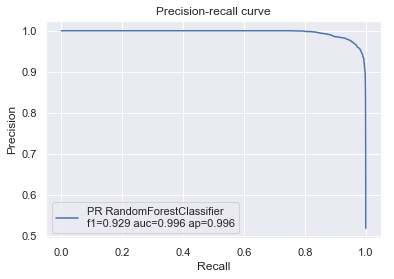

In [9]:
data.drop('hour', axis=1, inplace=True)
data.drop('newSender', axis=1, inplace=True)
data.drop('newReceiver', axis=1, inplace=True)
data.drop('merchant', axis=1, inplace=True)
data.drop('fraudsEarly', axis=1, inplace=True)


prep()
data.head()

In [11]:
data.drop('LTS', axis=1, inplace=True)
data.drop('LTR', axis=1, inplace=True)
data.drop('newbalanceDest', axis=1, inplace=True)




prep()
data.head()

KeyError: "['LTS'] not found in axis"